# IA340 Mini Project 

**Project Title:** Annual Unemployment Statistics for California 

## Research Question:
How has Californias unemployment statistics changed from 1990 to 2024? Which years showed the highest and lowest employment rates?

## Dataset Documentation 
**Source:** https://catalog.data.gov/dataset/local-area-unemployment-statistics-laus-annual-average
**Descrption:** Unemployment rate and labor force size by year and area type
**Time Period:** 1990-2024
**Reason for Choice:** California is my home state and has a large job market that I am interested in for a career. Additioanlly, finding a pattern of highs and lows in the job market could help me to decide when I should look for jobs and when I shouldn't. 

## Import

**Description:** This code allows for the use of secret manager client, which along with the other code, allows for the Jupyter AI magics so answer any questions on my dataset. Additional imports include pandas and warnings to assist in any missing packages and ignore warnings. 

In [1]:
import boto3
from botocore.exceptions import ClientError
import json

def get_secret(secret_name):
    region_name = "us-east-1"

    # Create a Secrets Manager client
    session = boto3.session.Session()
    client = session.client(
        service_name='secretsmanager',
        region_name=region_name
    )

    try:
        get_secret_value_response = client.get_secret_value(
            SecretId=secret_name
        )
    except ClientError as e:
        raise e

    secret = get_secret_value_response['SecretString']
    
    return json.loads(secret)

In [2]:
import warnings 
warnings.simplefilter('ignore')

In [3]:
import pandas as pd

In [4]:
df = pd.read_csv('s3://ia340-fall-2025-e115/laborforceandunemployment_annual_2025421.csv')
df.head() 

,Area Name,Area Type,Year,Month,Seasonally Adjusted(Y/N),Status,Labor Force,Employment,Unemployment,Unemployment Rate
0,California,State,1990,Annual,N,Final,15176300,14301800,874500,5.8
1,Los Angeles-Long Beach-Glendale MD,Metropolitan Area,1990,Annual,N,Final,4526600,4260700,265800,5.9
2,Los Angeles County,County,1990,Annual,N,Final,4526600,4260700,265800,5.9
3,Alameda County,County,1990,Annual,N,Final,678000,650600,27500,4.0
4,Alpine County,County,1990,Annual,N,Final,380,340,40,9.6


In [5]:
pip install -U pip setuptools wheel

Note: you may need to restart the kernel to use updated packages.


In [6]:
pip install --only-binary=:all: "tiktoken>=0.7.0"

Note: you may need to restart the kernel to use updated packages.


In [7]:
pip install "jupyter-ai-magics[all]" -q

Note: you may need to restart the kernel to use updated packages.


In [8]:
! pip install jupyter-ai-magics[all] -q

In [9]:
import warnings
warnings.simplefilter('ignore')

In [10]:
import os
os.environ["OPENAI_API_KEY"] = get_secret('openai')['api_key']

## Clean

**Description:** Using the Jupyter AI magics, I was able to properly clean my dataset by dropping any null values, any duplicate values, converting the 'Year' datetime to a proper numeric data type, check for validity, specifically for unemployemnt rate staying between 0-100, answer both parts of the research question by grouping data only from California, group the data by year, allowing to see growth or loss since 1990 to 2024, identify which years had the lowest and the highest unemployment rate with min() and max(), and lastly print the results.
**What Changed:** Their were no null values as well as duplicates beforehand. The datetime was switched to match a more numeric value, keeping it all the same. The areas of California were grouped by year under unemployment to change having just area types, and lastly showing the overall mean of Californias unemployment since 1990.

In [11]:
%load_ext jupyter_ai_magics

In [16]:
%%ai gpt4 -f code
Generate the python code to clean the data, {df}, to answer my research question 'How has Californias unemployment 
statistics, by local areas, changed from 1990 to 2024? Which years showed the highest and lowest employment rates?'
Show basic profiles such as .info(), .describe().
Handle missing values (drop/impute).
Remove duplicates if present. 
Fix datatypes (e.g., parse dates, numeric fields).
Lastly, check for validity (e.g., ranges, categories)
csv file is 's3://ia340-fall-2025-e115/laborforceandunemployment_annual_2025421.csv' 
use 'df', instead of data

In [17]:
import pandas as pd

df = pd.read_csv('s3://ia340-fall-2025-e115/laborforceandunemployment_annual_2025421.csv')

print(df.info())
print(df.describe())

df = df.dropna()

df = df.drop_duplicates()

df['Year'] = df['Year'].astype(int)
df['Labor Force'] = pd.to_numeric(df['Labor Force'], errors='coerce')
df['Employment'] = pd.to_numeric(df['Employment'], errors='coerce')
df['Unemployment'] = pd.to_numeric(df['Unemployment'], errors='coerce')
df['Unemployment Rate'] = pd.to_numeric(df['Unemployment Rate'], errors='coerce')

df = df[df['Year'].between(1990,2024)]
df = df[df['Area Name'].str.contains('California')]

df.to_csv('cleaned_laborforceandunemployment_df.csv', index=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17048 entries, 0 to 17047
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Area Name                 17048 non-null  object 
 1   Area Type                 17048 non-null  object 
 2   Year                      17048 non-null  int64  
 3   Month                     17048 non-null  object 
 4   Seasonally Adjusted(Y/N)  17048 non-null  object 
 5   Status                    17048 non-null  object 
 6   Labor Force               17048 non-null  int64  
 7   Employment                17048 non-null  int64  
 8   Unemployment              17048 non-null  int64  
 9   Unemployment Rate         17048 non-null  float64
dtypes: float64(1), int64(4), object(5)
memory usage: 1.3+ MB
None
               Year   Labor Force    Employment  Unemployment  \
count  17048.000000  1.704800e+04  1.704800e+04  1.704800e+04   
mean    2015.215744  1.230955e+05 

## Process/ Aggregate 

**Description:** The Jupyter Ai generated the code for creating a groupby. for my research question. The groupby. generated assists my research question by making the sum, mean and max of each area type by year. This assists my research question by showing which states possibly have the highest population growths, as well as showing the number of the highest populated area within the state. This can help identify unemployment, whether it had a growth or decline. 

In [22]:
%%ai gpt4 -f code
Create python code to create a group by., {df}, and show the results. 

In [23]:
# Create groupby object
grouped_df = df.groupby(['Year','Area Type'])

# Display groupby results
print(grouped_df['Labor Force'].sum())
print(grouped_df['Unemployment'].mean())
print(grouped_df['Employment'].max())

Year  Area Type       
1990  State               15176300
1991  State               15127400
1992  State               15314800
1993  State               15258800
1994  State               15253900
1995  State               15249600
1996  State               15419500
1997  State               15800900
1998  State               16163200
1999  State               16430400
2000  State               16869900
2001  State               17145300
2002  State               17295500
2003  State               17331600
2004  State               17450100
2005  State               17635600
2006  State               17786000
2007  State               18068900
2008  State               18367400
2009  State               18430800
2010  State               18363500
      Sub-County Place        5600
2011  State               18357600
      Sub-County Place        5700
2012  State               18478700
      Sub-County Place        6200
2013  State               18584200
      Sub-County Place        57

## Query

**Description:** The filter generated by Jupyter Ai is meaningful because it shows all the years in the dataset with California's statistics and by looking at it shows an interpretable trend with unemployment rate, highlighting the last half of the years has the highest rates of unemployment. 

In [25]:
%%ai gpt4 -f code
Create the python code creating a meaningful filter with values only from the state 'California', using the dates (1990-01-01) and (2024-12-31), using {df}, and 
show the results in a Dataframe

In [26]:
# Create filter
mask = ((df['Area Name'] == 'California') & 
        (df['Year'] >= 1990) & 
        (df['Year'] <= 2024) & 
        (df['Area Type'] == 'State'))

# Apply filter to dataframe
filtered_df = df[mask]

# Display dataframe
print(filtered_df)

        Area Name Area Type  Year   Month Seasonally Adjusted(Y/N) Status  \
0      California     State  1990  Annual                        N  Final   
87     California     State  1991  Annual                        N  Final   
174    California     State  1992  Annual                        N  Final   
261    California     State  1993  Annual                        N  Final   
348    California     State  1994  Annual                        N  Final   
435    California     State  1995  Annual                        N  Final   
522    California     State  1996  Annual                        N  Final   
609    California     State  1997  Annual                        N  Final   
696    California     State  1998  Annual                        N  Final   
783    California     State  1999  Annual                        N  Final   
870    California     State  2000  Annual                        N  Final   
957    California     State  2001  Annual                        N  Final   

## Visualize

**Description:** Each graph is similar in nature, however, the dual-axis chart goes further into showing the growth of California. With the first graph, using Jupyter AI, the code generated shows the enemployemnt rate from 1990 to 2024. As indicated on the graph, there were three major spikes showing the highest unemployment rates in years 1993, 2010, and 2020. The highest being 2010 and follow that would be the lowest point of unemployment in roughly 2018, showing signiifcant growth for the work force. In graph 2, using Jupyter AI again, the growth of the labor force is shown on a visual scale comparing to the unemployment numbers in the millions. As you can see, there was a large spike in the labor force roughly the same year the unemployment numbers hit their lowest between 1990 and 2024. To further my research question, I could look into the events of California's history and locate what caused a drop in unemployment in 2018, as well as what three events caused the highest unemployments. 

### Graph #1

In [28]:
%%ai gpt4 -f code
Calculate the unemployment rate of 'California' with the data provided in {filtered_df}, 
use the filtered_df directly, and visualize the result on a line chart

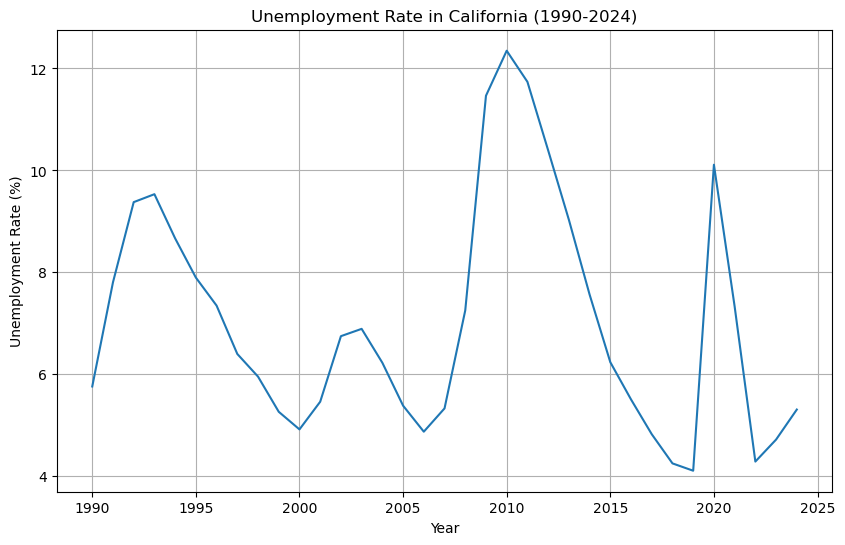

In [29]:
import matplotlib.pyplot as plt

# Filter data for 'California' state
filtered_df = df[df['Area Name'] == 'California']

# Calculate unemployment rate
filtered_df['Unemployment Rate'] = (filtered_df['Unemployment'] / filtered_df['Labor Force']) * 100

# Visualize the unemployment rate over the years
plt.figure(figsize=(10, 6))
plt.plot(filtered_df['Year'], filtered_df['Unemployment Rate'])
plt.xlabel('Year')
plt.ylabel('Unemployment Rate (%)')
plt.title('Unemployment Rate in California (1990-2024)')
plt.grid()
plt.show()

### Graph #2

In [36]:
%%ai gpt4 -f code
Calculate the labor force of 'California' with the data provided in {filtered_df}, as well as the unemployment for 'California',
use the filtered_df directly, and visualize the result on a dual-axis chart. Indicate the axis on the left and right are in the millions, and add a legend

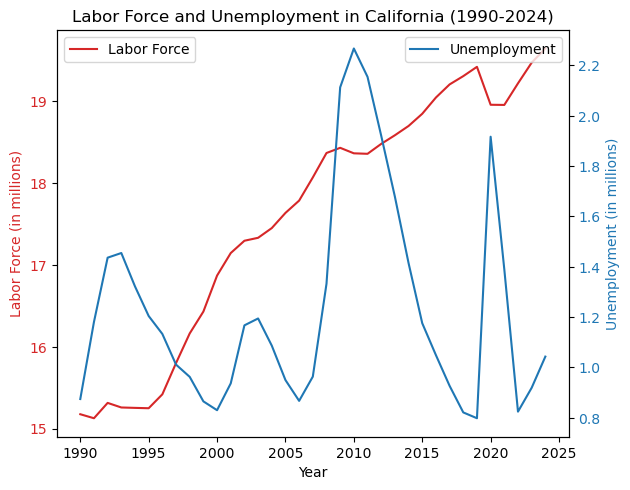

In [37]:
import matplotlib.pyplot as plt

# Filter data for 'California' state
filtered_df = df[df['Area Name'] == 'California']

# Get California labor force and unemployment data
california_labor = filtered_df['Labor Force'] / 1000000
california_unemployment = filtered_df['Unemployment'] / 1000000

# Create dual-axis plot
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Labor Force (in millions)', color=color)
ax1.plot(filtered_df['Year'], california_labor, color=color, label='Labor Force')
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()  
color = 'tab:blue'
ax2.set_ylabel('Unemployment (in millions)', color=color)  
ax2.plot(filtered_df['Year'], california_unemployment, color=color, label='Unemployment')
ax2.tick_params(axis='y', labelcolor=color)

ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

fig.tight_layout()  
plt.title('Labor Force and Unemployment in California (1990-2024)')
plt.show()